In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"F:\DSA\Analytics Vidya\Black Friday Sales\train.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
train['Product_Category_2'].fillna(0, inplace = True)
train['Product_Category_3'].fillna(0, inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24508\688664840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Product_Category_2'].fillna(0, inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24508\688664840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [7]:
import sklearn.preprocessing as sk

In [8]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 770.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
le = sk.LabelEncoder()
columns = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in columns:
    train[col] = le.fit_transform(train[col])

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
x = train.drop(['User_ID', 'Purchase'], axis = 1)
y = train['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [137]:
import xgboost as xgb

In [138]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1,max_depth = 5, 
                           alpha = 10, 
                           n_estimators = 100)

In [139]:
xg_reg.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [140]:
predictions = xg_reg.predict(x_test)

In [141]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)

RMSE: 2924.1403813748093


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [142]:
xg_reg.score(x_test, y_test)

0.6600707992956121

In [143]:
r2_score(y_test, predictions)

0.6600707992956121

In [26]:
#Cross Validation of model using KFold and Stratified KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

print(f"Model: XGBoost Regressor")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(xg_reg, x, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(xg_reg, x, y, cv=stratified_cv)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: XGBoost Regressor
KFold CV Scores:
[0.66154972 0.66171807 0.66370304 0.6650636  0.66718956 0.6679531
 0.66463707 0.66518971 0.66989247 0.66574227]
KFold Mean Accuracy: 0.6652638599531595
KFold Standard Deviation of Accuracy: 0.0024866707802588123



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Stratified KFold CV Scores:
[0.66529984 0.66587396 0.66342261 0.66574986 0.66796839 0.66359649
 0.66479827 0.66866731 0.66559772 0.66335643]
Stratified KFold Mean Accuracy: 0.6654330884593084
Stratified KFold Standard Deviation of Accuracy: 0.001713421960948121



In [172]:
test = pd.read_csv(r"F:\DSA\Analytics Vidya\Black Friday Sales\test.csv")

In [165]:
le = sk.LabelEncoder()
columns = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in columns:
    test[col] = le.fit_transform(test[col])

In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  int32  
 2   Gender                      233599 non-null  int32  
 3   Age                         233599 non-null  int32  
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  int32  
 6   Stay_In_Current_City_Years  233599 non-null  int32  
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int32(5), int64(4)
memory usage: 15.1 MB


In [167]:
test['Product_Category_2'].fillna(0, inplace = True)
test['Product_Category_3'].fillna(0, inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24508\4112786276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Product_Category_2'].fillna(0, inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24508\4112786276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [168]:
test = test.drop('User_ID', axis = 1)

In [169]:
test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1144,1,4,7,1,2,1,1,11.0,0.0
1,994,1,2,17,2,0,0,3,5.0,0.0
2,2672,0,3,1,1,4,1,5,14.0,0.0
3,1299,0,3,1,1,4,1,4,9.0,0.0
4,519,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...
233594,1049,0,2,15,1,4,1,8,0.0,0.0
233595,2345,0,2,15,1,4,1,5,8.0,0.0
233596,303,0,2,15,1,4,1,1,5.0,12.0
233597,1105,0,4,1,2,4,0,10,16.0,0.0


In [170]:
test_pred = xg_reg.predict(test)

In [171]:
test_pred

array([12663.338, 10605.218,  5632.554, ..., 11967.573, 14897.594,
        2529.829], dtype=float32)

In [38]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,2734,1,6,16,2,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,0.0,0.0,368
550064,1006035,3568,0,2,1,2,3,0,20,0.0,0.0,371
550065,1006036,3568,0,2,15,1,4,1,20,0.0,0.0,137
550066,1006038,3568,0,6,1,2,2,0,20,0.0,0.0,365


In [39]:
test

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1144,1,4,7,1,2,1,1,11.0,0.0
1,994,1,2,17,2,0,0,3,5.0,0.0
2,2672,0,3,1,1,4,1,5,14.0,0.0
3,1299,0,3,1,1,4,1,4,9.0,0.0
4,519,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...
233594,1049,0,2,15,1,4,1,8,0.0,0.0
233595,2345,0,2,15,1,4,1,5,8.0,0.0
233596,303,0,2,15,1,4,1,1,5.0,12.0
233597,1105,0,4,1,2,4,0,10,16.0,0.0


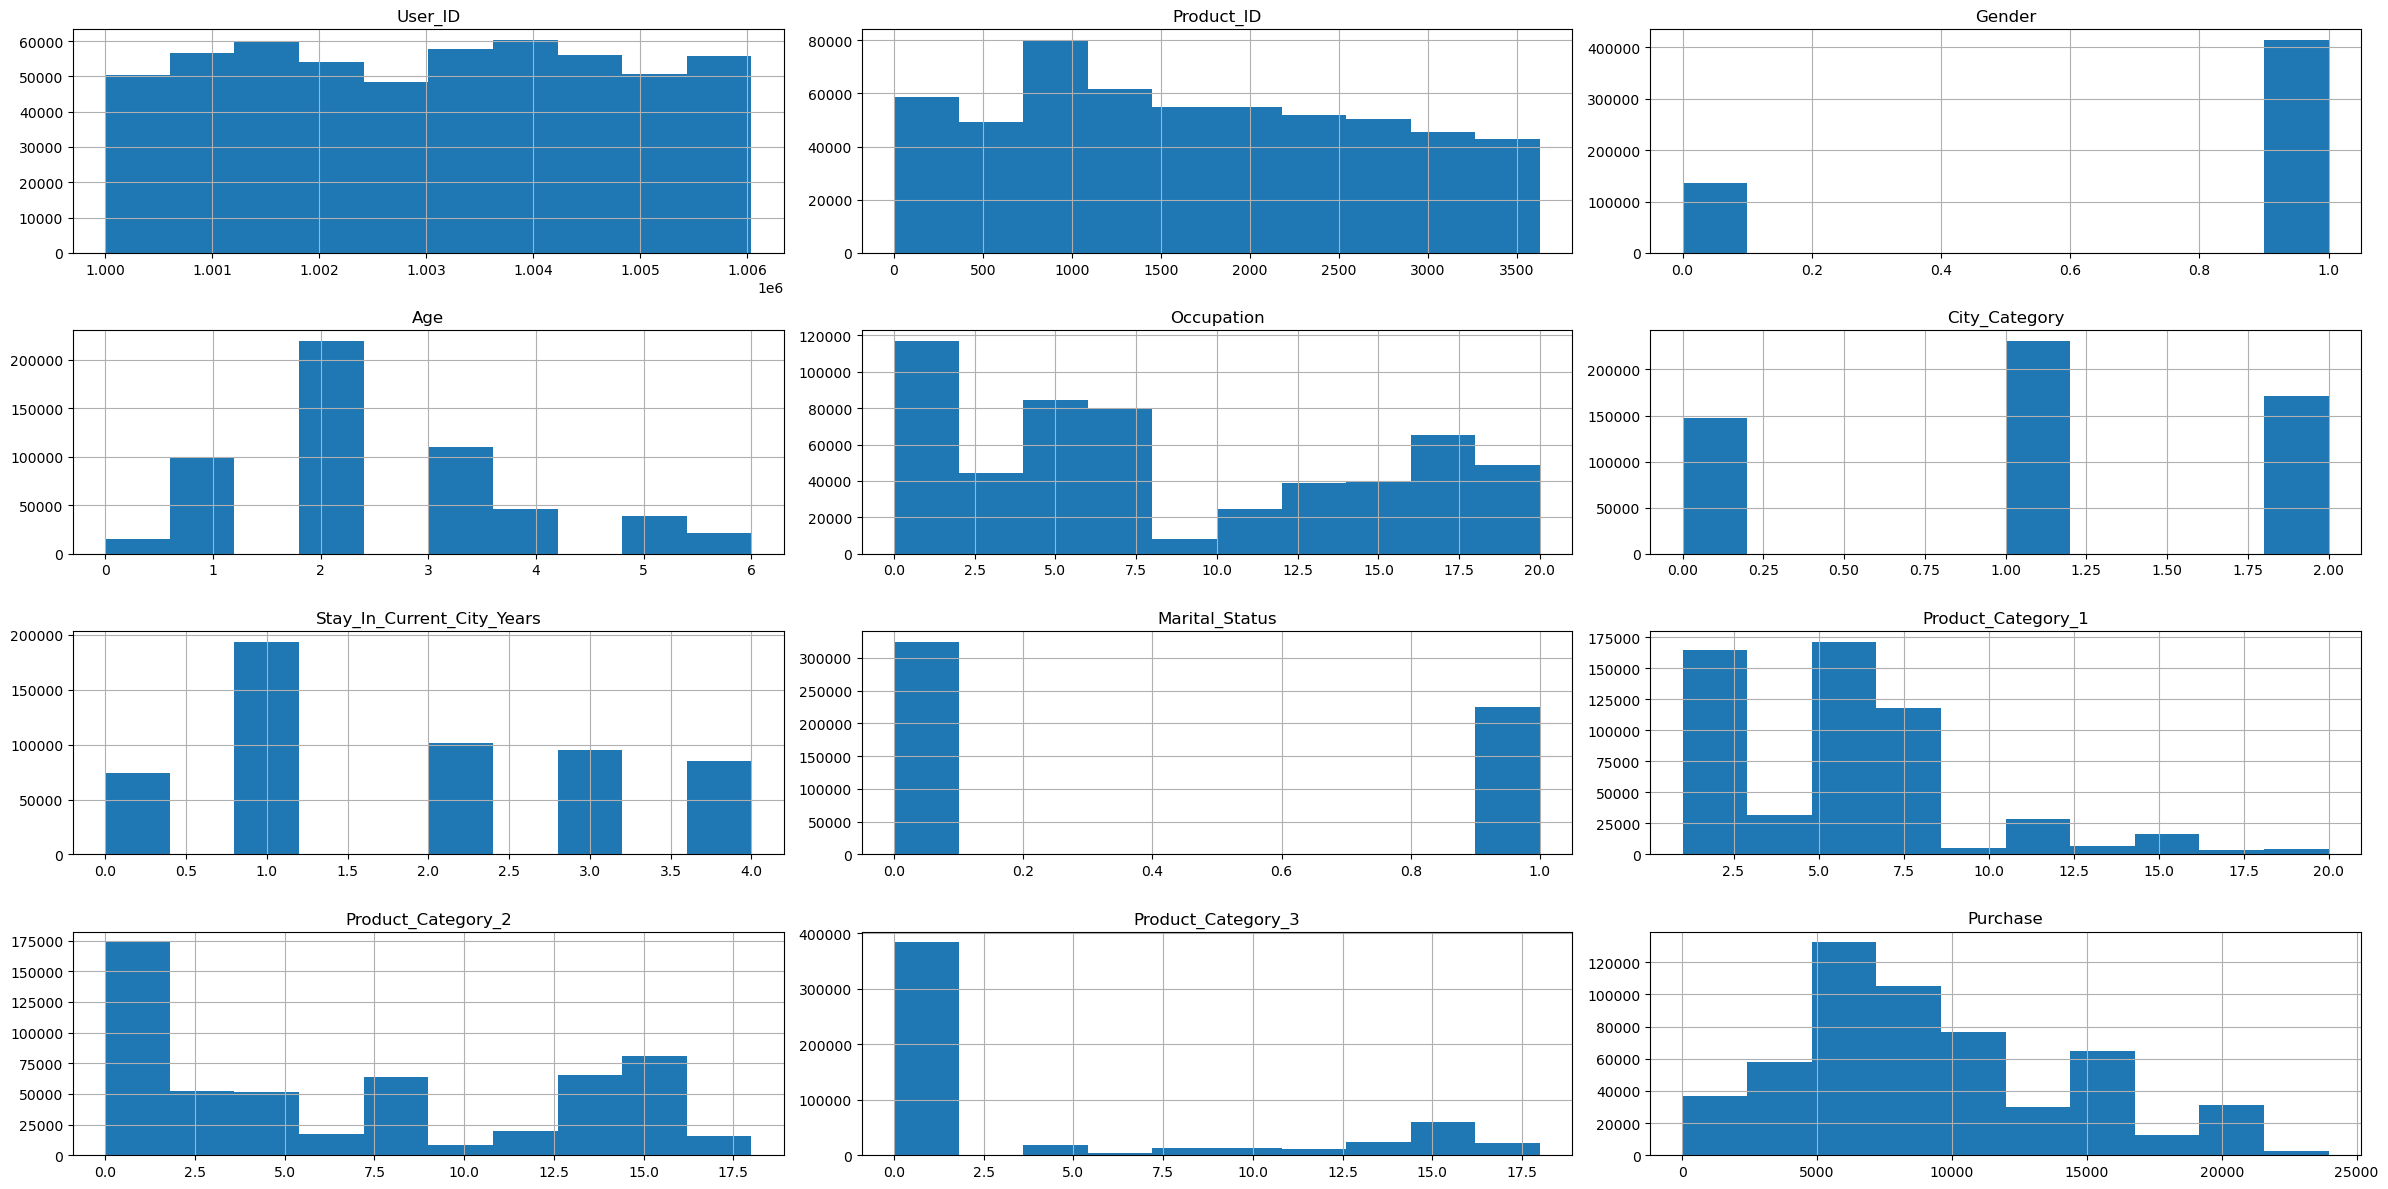

In [51]:
train.hist(figsize = (24,12))
plt.tight_layout()
plt.show()

In [52]:
train.shape

(550068, 12)

In [174]:
submission = pd.DataFrame({'Purchase': test_pred, 'User_ID' : test['User_ID'], 'Product_ID' : test['Product_ID']})
submission.to_csv('Black Friday Prediction.csv', index = False)